## Разведочный анализ с seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline


### Разведочный анализ данных (Exploratory Data Analysis - EDA)

Разведочный анализ: первичное изучение и очистка данных (обработка пропусков, выбросов, ошибок), первичный отбор признаков для построения модели, преобразование нечисловых данных, формулирование и проверка гипотез.

В основном - работа с дескриптивными статистиками и визуальным представлением признаков.

### Основные методы:

**1. Одномерный анализ**

Распределения и дескриптивные статистики для каждой переменной.

**2. Двумерный анализ**

Исследование переменных попарно (зависимость и независимость, проверка на мультиколлинеарность).

**3. Снижение размерности**

Поиск и выделение признаков, которые отвечают за наибольшую вариативных в данных. 



### Цели EDA

* Обнаружить паттерны
* Заметить аномалии
* Сформулировать гипотезы
* Проверить предположения

### Что исследуется:

* Тренды
* Распределения
* Центральные тенденции и разброс
* Выбросы
* Корреляции
* Проверка гипотез

Для демонстрации используется набор данных House Prices Competition (обучающая выборка). 

Подробное описание данных и переменных:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    

In [2]:
data = pd.read_csv('house_prices.csv')

In [3]:
data.shape

(1460, 81)

Всего 1460 наблюдений, каждое из которых характеризуется 81 признаком, среди которых: 36 количественных, 43 категориальных + id + целевая переменная SalePrice.

Количественные признаки: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Категориальные признаки: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
data.iloc[100:125]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
105,106,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,250000
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
107,108,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Partial,115000
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000


In [7]:
data.info() # вывод информации о пропусках и типах данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# Определение количественных и категориальных переменных
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[np.object])

In [9]:
numeric_features.iloc[:, :18].describe() # вывод описательных статистик первых 18 количественных переменных

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000


In [10]:
numeric_features.iloc[:, 18:].describe() # вывод описательных статистик остальных количественных переменных

,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Количественные переменные: распределения

Две важные характеристики распределения, близкого к нормальному, - **смещение** или **асимметрия** (**skew**) и **эксцесс** (**kurtosis**). Они показывают, в какую сторону смещено распределение переменной относительно нормального, и насколько большие хвосты (tails) имеет распределение.

Для определения этих харктеристик можно визуализировать распределения (качественная оценка) и/или вычислить соответствующие статистики. 

![](https://miro.medium.com/max/1500/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

* Нормальное симметричное распределение имеет смещение между - 0.5 и 0.5
* От - 1 до - 0.5 - умеренное негативное смещение.
* Меньше -1 - высокое смещение. 

Для положительных значений - симметрично.




In [11]:
numeric_features.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

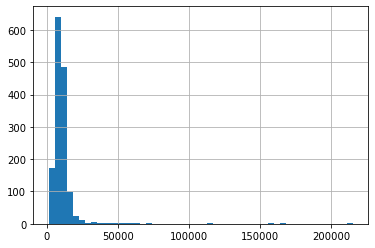

In [12]:
data.LotArea.hist(bins = 50) # Визуализация распределения признака с большим смещением

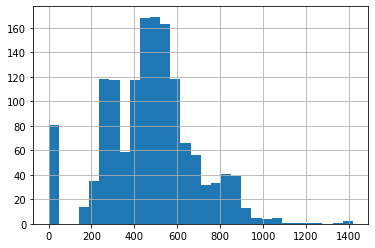

In [13]:
data.GarageArea.hist(bins = 30) # Визуализация распределения признака, с незначительным (судя по статистике) смещением

Значение эксцесса характеризует наличие/количество выбросов в данных.

![](https://miro.medium.com/max/928/1*Nqu07THa7APRTOF7kaVr5Q.jpeg)


* Нормальное распределение имеет значение **kurtosis**, близкое к 0. Можно оценить количество выбросов по характеристикам распределения
![](https://study.com/cimages/multimages/16/empirical_rule.png)

* Значение больше 0 - распределение островершнинное (leptokurtic), значит в хвостах распределения много значений (= много выбросов)
* Значение меньше 0 - распределение с отрицательным эксцессом (platykurtic), в таком распределении мало или нет выбросов.


Подробнее про смещение и эксцесс: [здесь](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa).

In [14]:
numeric_features.kurtosis()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

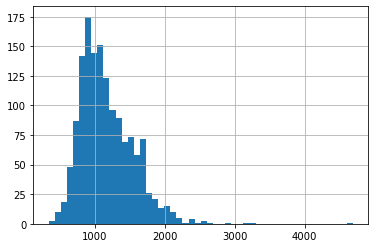

In [15]:
data['1stFlrSF'].hist(bins = 50) # Визуализация распределения признака с kurtosis больше 5

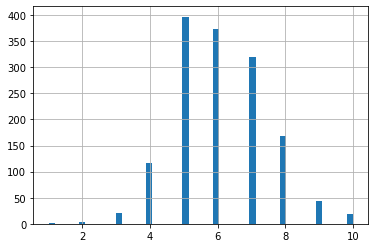

In [16]:
data['OverallQual'].hist(bins = 50) # Визуализация распределения признака, значение kurtosis которого близко к нулю

**Следует всегда отдельно изучить целевую переменную, которую необходимо прогнозировать.** В данном случае это цена дома.

In [17]:
y = data['SalePrice'] # Сохранение значений целевой переменной в y

1.8828757597682129
6.536281860064529


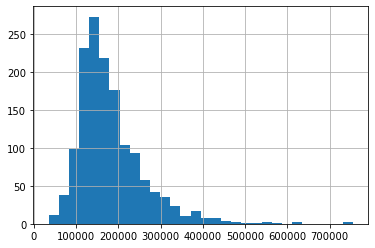

In [18]:
y.hist(bins = 30) # Визуализация распределения значений целевой переменной
print(y.skew())
print(y.kurtosis())

EDA можно выполнять только методами **pandas** и **matplotlib**, но функционал библиотеки **seaborn** более обширный. Например, библотека позволяет сравнить анализируемое распределение со стандартными (в частности, с нормальным и логнормальным).

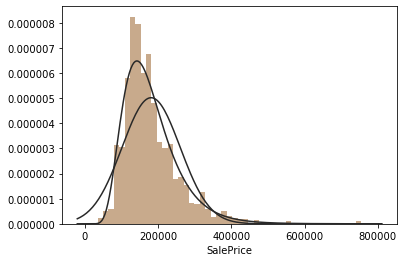

In [19]:
sns.distplot(y, kde=False, fit=sts.norm)
sns.distplot(y, kde=False, fit=sts.lognorm)

Можно построить два отдельных графика, инициировав два объекта **figure**

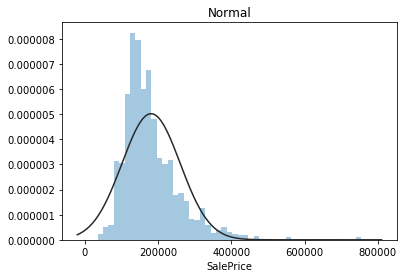

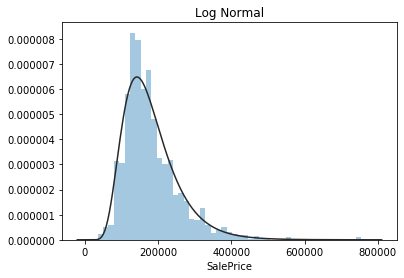

In [20]:
plt.figure(); plt.title('Normal')
sns.distplot(y, kde=False, fit=sts.norm)

plt.figure(); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=sts.lognorm)

Графики показывают, что распределение признака ближе к логнормальному. 

Такое распределение целесообразно логарифмировать (могут быстрее сходиться алгоритмы: линейные модели в принципе предпологают, что переменные должны быть распределены нормально, корреляция легче интерпретируется и т.д.)

0.12133506220520406
0.8095319958036296


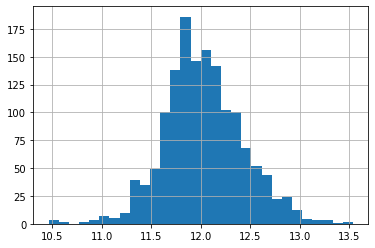

In [21]:
np.log(y).hist(bins = 30) # строим распределение
print(np.log(y).skew())
print(np.log(y).kurtosis())

В процессе изучения одномерных распределений можно выявить аномальные значения, и принять решения о методе их обработки. 

### Задание.
Проанализировать распределение признака **1stFlrSF** и еще 3 количественных признаков, выбранных по собственному усмотрению на предмет наличия аномальных значений. 

Анализ и выводы (с обоснованиями) оформить в виде отчета.

## Корреляционные матрицы

Следующий шаг - это изучение зависимостей в данных.
Для этого можно использовать тепловую карту корреляций, попарные графики и графики рассеяния.


[Напоминание о корреляции](http://statistica.ru/theory/koeffitsient-korrelyatsii/)


In [22]:
# Построение корреляционной матрицы 
# Метод corr возвращает датафрейм с коэффициентами корреляции Пирсона для соответствующих пар признаков (строка-столбец) 
correlation = numeric_features.corr()
correlation.head() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [23]:
# Вычисление коэффициентов попарной корреляции всех признаков с целевым признаком SalePrice
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

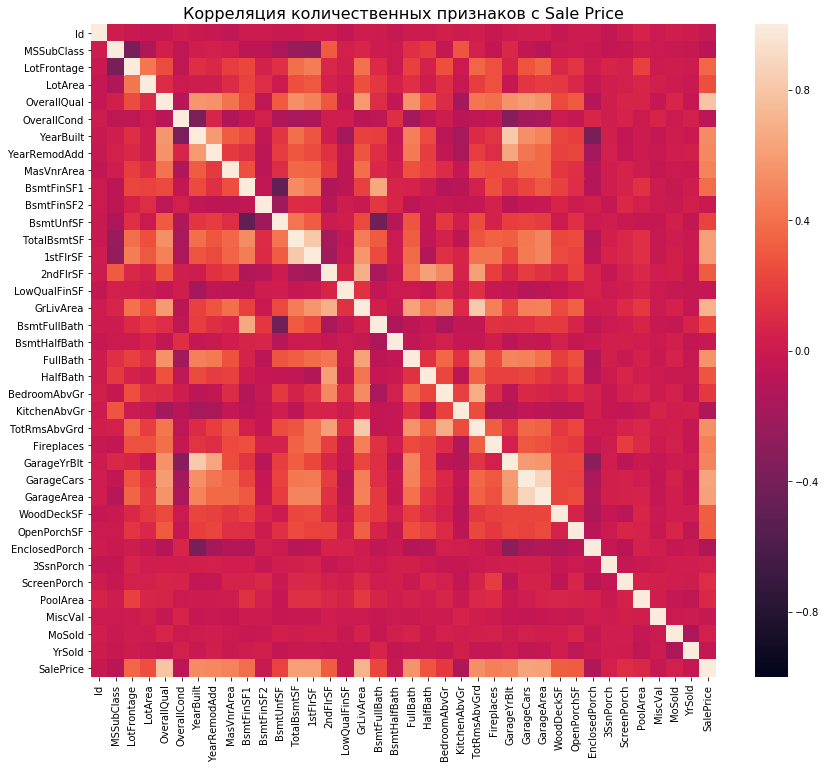

In [24]:
# Построение тепловой карты корреляций

fig , ax = plt.subplots(figsize = (14,12))

plt.title('Корреляция количественных признаков с Sale Price', size=16)

sns.heatmap(correlation, vmax=1.0, vmin = -1)

На этом графике можно увидеть признаки, которые сильно коррелируют с целевой переменной, а значит обладают большим предсказательным потенциалом. А также найти переменные, которые сильно коррелируют между собой, и избавиться от части из них в финальной модели. Здесь нас интересуют значения, близкие к - 1 и 1.

Можно выделить два кластера с потенциальной мультиколлинеарностью (наличием линейной зависимости между входными переменными (факторами) регрессионной модели) - **TotalBsmtS** и **1stFlrSF**, и переменные **GarageX**.

С целевым признаком **SalePrice** сильнее всего коррелируют **GrLivArea** и **OverallQual**. 

Следует изучить данные подбробнее.

Отфильтруем по индексу 10 топ-корреляций с ценой (взято 11, потому что включается корреляция переменной самой с собой.)

In [25]:
correlation['SalePrice'].sort_values(ascending = False).head(11).index 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [26]:
correlation.nlargest(11,'SalePrice')['SalePrice'].index   # альтернативный вариант

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [27]:
# Сохранение индексов столбцов с наибольшей корреляцией для последующей фильтрации
cols = correlation.nlargest(11,'SalePrice')['SalePrice'].index 

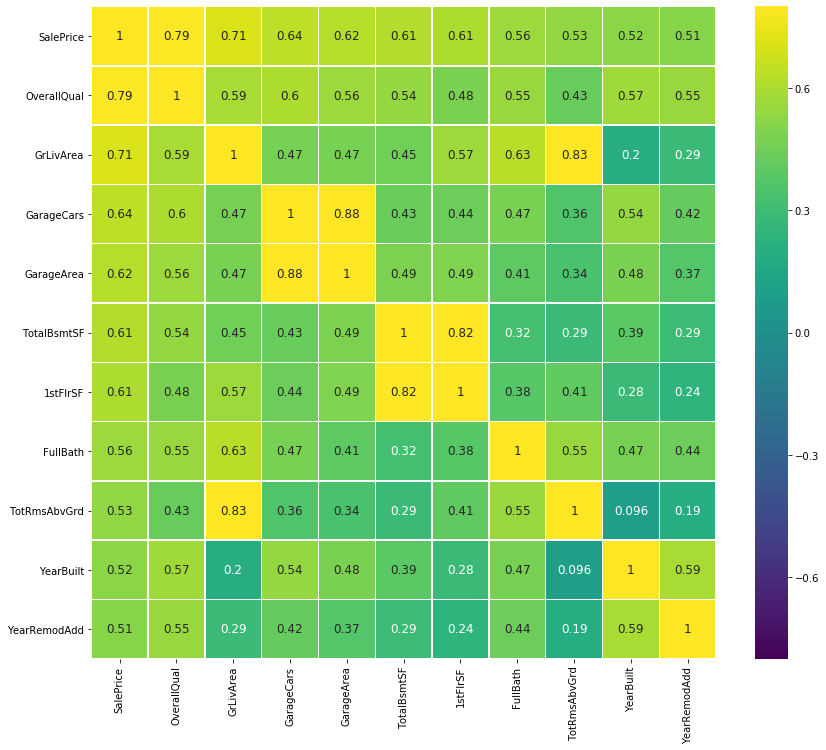

In [28]:
# Построение тепловой карты корреляций для отфильтрованных столбцов
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation.loc[cols, cols], vmax=0.8, vmin = -0.8, linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Тепловая карта показывает, что переменные **TotalBsmtS** и **1stFlrSF** и переменные **GarageX** действительно коррелируют между собой. Кроме того, цена действительно сильнее всего связана с  **GrLivArea** и **OverallQual**.

### Промежуточные выводы

* Признаки **OverallQual** и **GrLivArea** сильно коррелируют с  **SalePrice**.
* Признаки **GarageCars** и **GarageArea** сильно коррелируют между собой. Это понятно: количество машин, помещающихся в гараж, является фукнцией площади гаража. Для будущей модели следует использовать один признак из этих двух (например, тот, который сильнее коррелирует с ценой).
* **TotalBsmtSF** и **1stFloor** также сильно зависимы.
* Как и **TotRmsAbvGrd** и **GrLivArea**.

## Попарные визуализации
С помощью матрицы корреляций были выявлены переменные, которые сильнее всего коррелируют с ценой дома. С помощью попарных графиков можно лучше изучить эти взаимосвязи.

In [29]:
# Вывод списка признаков с высокой корреляцией (для наглядности)
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [30]:
# Формирование нового списка с удаленными признаками-членами пар с обнаруженной мультиколлинеарностью
new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

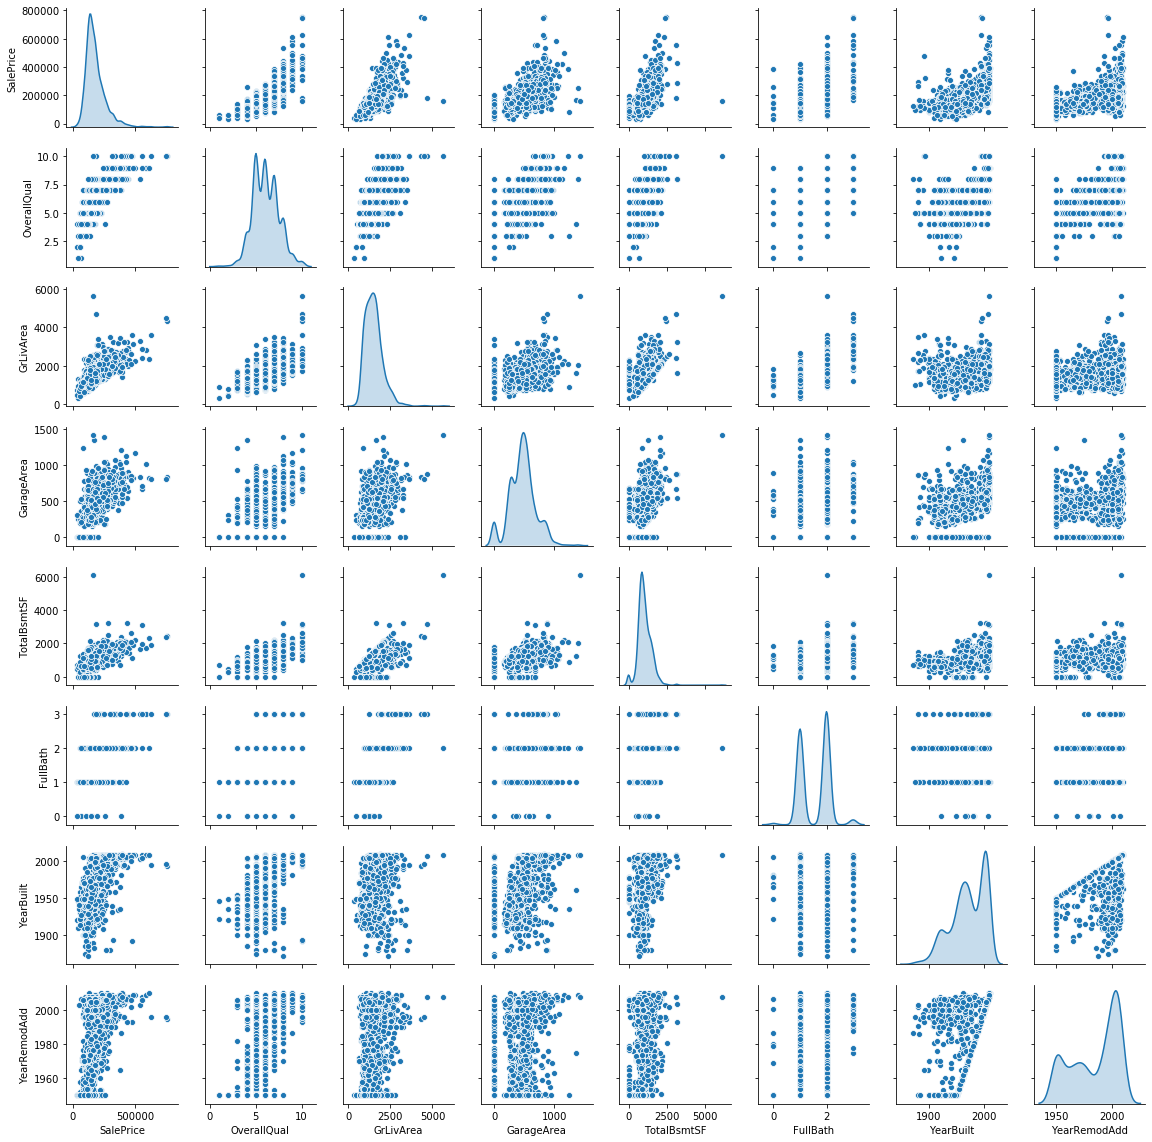

In [31]:
# Вывод попарных графиков рассеяния
sns.pairplot(data[new_cols], height = 2, kind ='scatter', diag_kind='kde')
plt.show()

Для лучшего понимания зависимостей выполним лог-нормирование распределения цены и проанализируем полученные графики.

In [32]:
# Создадим новую переменную с логарифмом цены
data['logSalePrice'] = np.log(data['SalePrice']) 
new_cols_log = ['logSalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

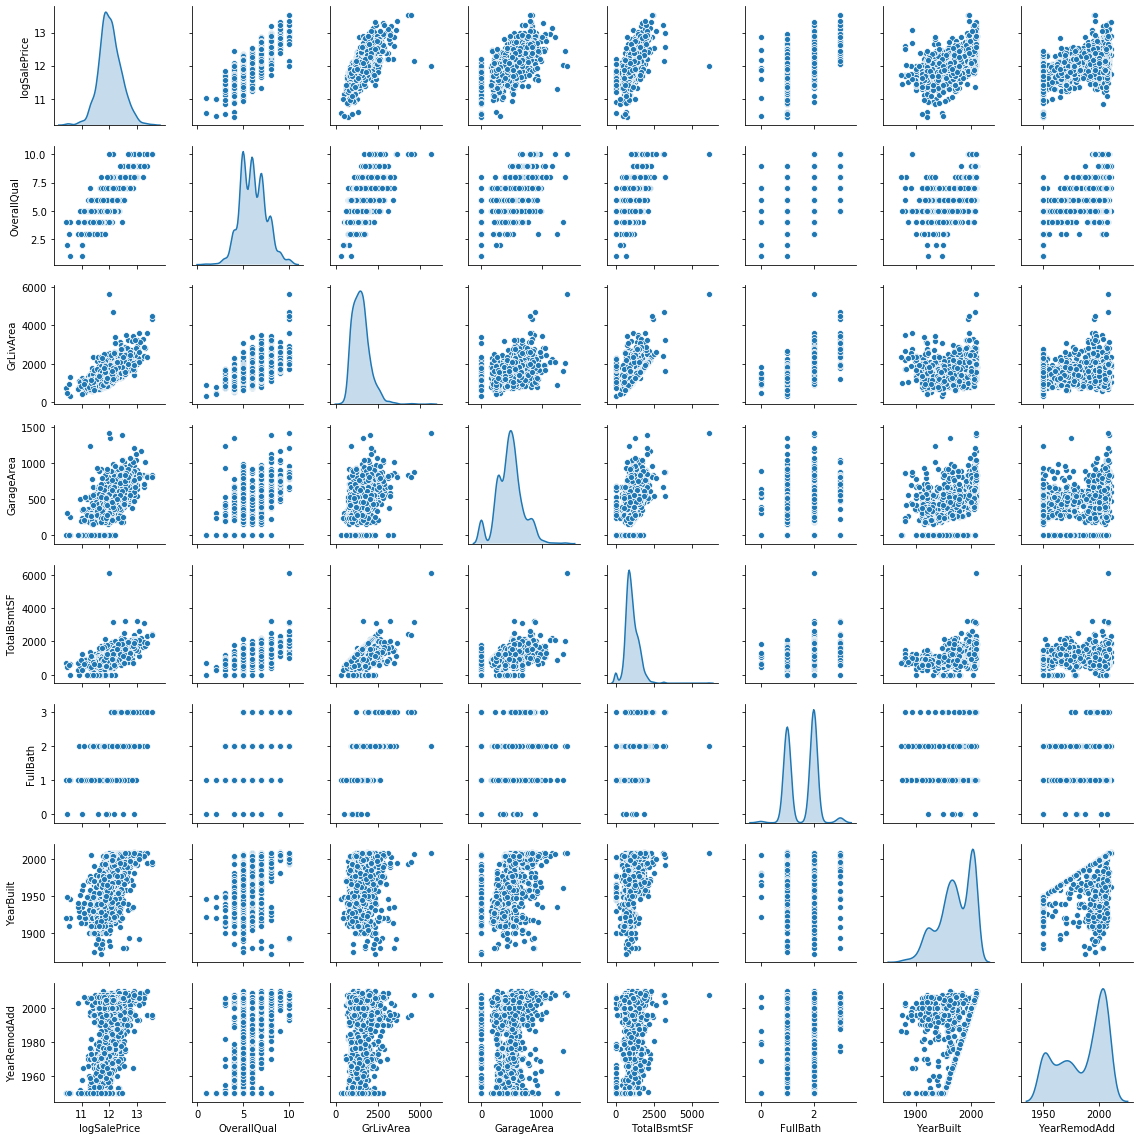

In [33]:
sns.pairplot(data[new_cols_log], height = 2, kind ='scatter', diag_kind='kde')
plt.show()

Характер зависимостей на многих графиках стал более линейным (например цена и **OverallQuall**).

### Промежуточные выводы

* Интересен характер связи ряда переменных, например, **TotalBsmtSF** и **GrLiveArea**. Видна диагональ, которая делит область построения на секторы, и все наблюдения сконцетрированы ниже этой диагонали. Это понятно: площадь подвального помещения будет меньше или равна площади дома.

* Взаимосвязь между **SalePrice** и **YearBuilt** имеет экспоненциальный характер. Это одна из причин, почему коэффициент корреляции Пирсона был невысокий - эта связь не линейная.


## Попарные графики рассеяния для непрерывных переменных

Графики, иллюстрирующие взаимосвязи признаков, можно строить и отдельно. Например, графики рассеяния с линейным трендом.

Графики рассеяния должны использоваться, когда обе переменные непрерывны. Построим такие графики для всех переменных, показавших самую высокую корреляцию с ценой. 

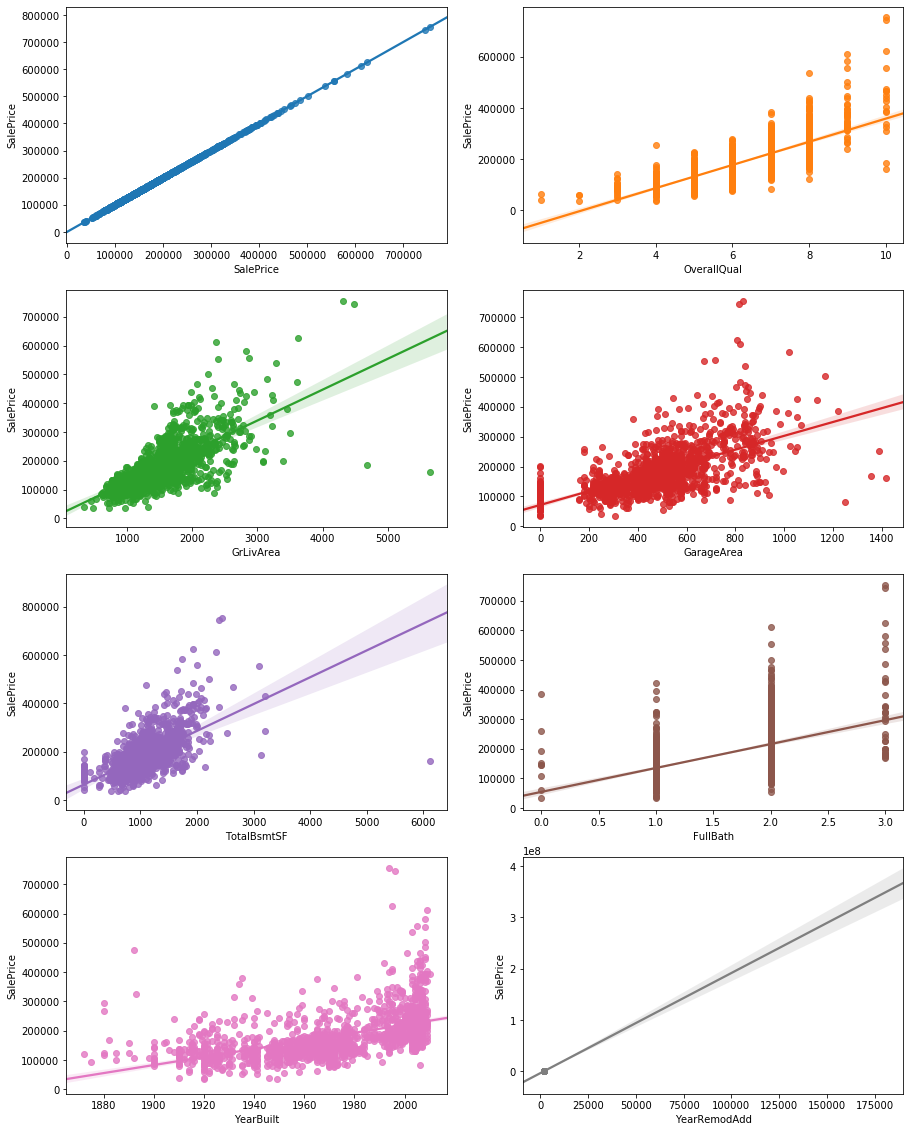

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
ax_lst = [ax[0][0], ax[0][1], ax[1][0], ax[1][1], ax[2][0], ax[2][1], ax[3][0], ax[3][1]]
for col,ax_i in zip(new_cols,ax_lst):
    sns.regplot(x = col, y = 'SalePrice', data = data, scatter = True, fit_reg = True, ax = ax_i)


Последний график "сломался", выведем его отдельно.

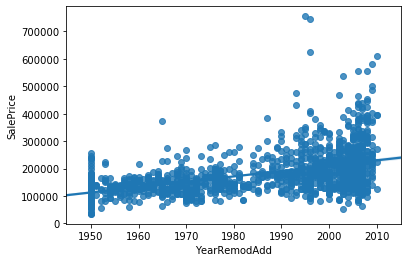

In [35]:
sns.regplot(x = 'YearRemodAdd', y = 'SalePrice', data = data, scatter = True, fit_reg = True)

В таком приближенном рассмотреннии хорошо заметны выбросы. Например, видно, как в признаке **TotalBsmt** одна точка в правом нижнем углу тянет тренд на себя.

Ниже пример, как может измениться тренд после удаления выбросов

![](https://cdn-images-1.medium.com/max/800/0*_SHBO9KupWceAJsa.)

### Задание.
Попытаться обосновать стратегию обработки выбросов для всех анализируемых столбцов.

Анализ и выводы (с обоснованиями) оформить в виде отчета.

## Попарные ящики с усами для категориальных переменных

В случае, когда одна из анализируемых переменных порядковая или категориальная, а вторая непрерывная, для визуализации имеет смысл использовать ящики с усами, чтобы изучать распределения непрерывной переменной внутри порядковых значений или категорий.

[Подробнее про ящик с усами](https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html)

[Еще ссылка](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

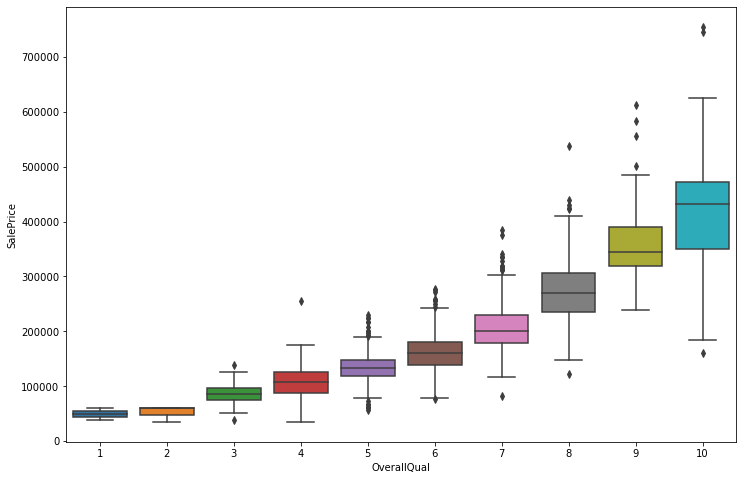

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

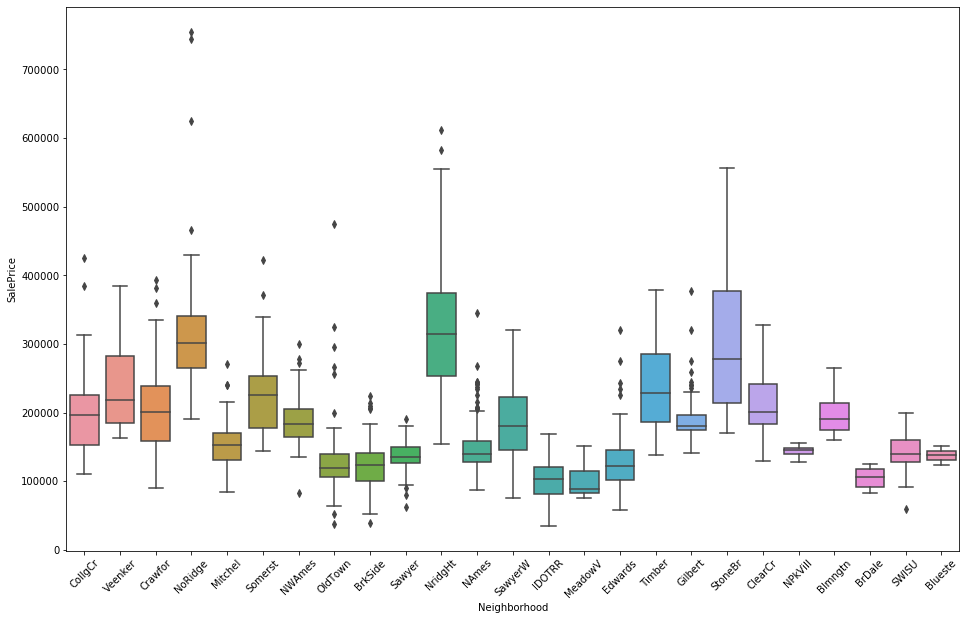

In [37]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data)
plt.xticks(rotation=45)

Для оценки распределения категориальных переменных обычно используется столбцовая диаграмма (бар-чарт), которая показывает, сколько наблюдений попадает в каждую категорию.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

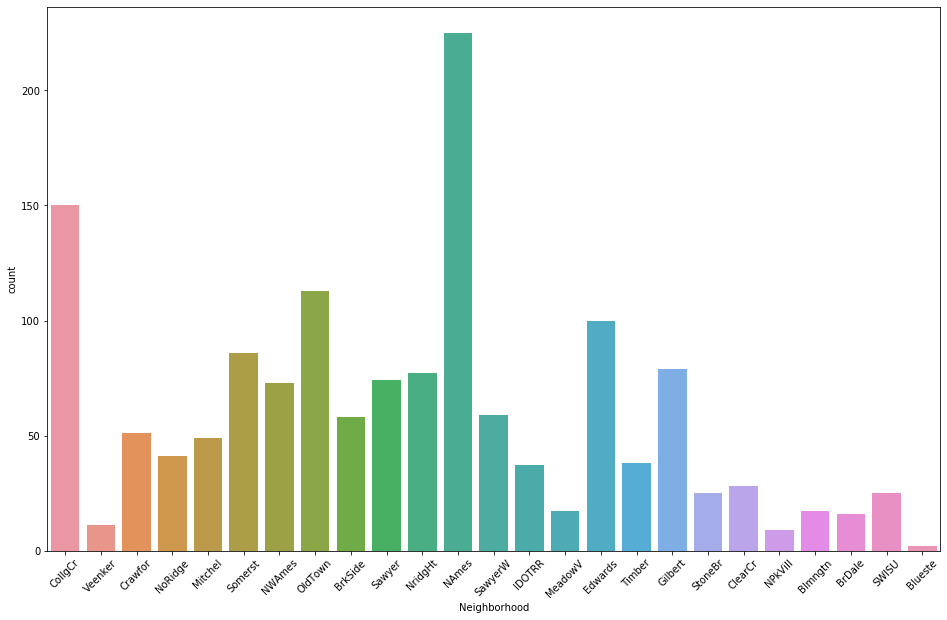

In [38]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.countplot(x='Neighborhood', data=data)
plt.xticks(rotation=45)

Диаграмма показывает, что есть несколько райнов с похожими ценами. Это можно использовать, например, для снижения размерности: объединять значения признака **Neighborhood** в более крупные категории.

Построим графики для категориальных переменных анализируемого набора.

In [39]:
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

В наборе данных есть категориальные переменные со значительным количеством пропущенных значений. 

Требуется обработка этих данных.

In [41]:
for c in categorical_features:
    data[c] = data[c].astype('category') # преобразование к типу данных "категория"
    if data[c].isnull().any():   # проверка на наличие пропусков
        data[c] = data[c].cat.add_categories(['missing'])   # добавление новой категории 
        data[c] = data[c].fillna('missing')    # заполнение пропусков новой категорией

In [42]:
data['Alley'].value_counts()

missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

Для удобства последующих построений преобразуем данные. Формат melt это, по сути, unpivot table (разворачивание группированной таблицы в "длинный" формат).

In [43]:
data_melted = pd.melt(data, id_vars=['SalePrice'], value_vars=categorical_features)
data_melted.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


Для изучения распределений нужно построить множество ящиков с усами. С этой целью удобно создать функцию **boxplot**, которая будет строить графики (ящики с усами) и переворачивать метки на 90 градусов. Аргумент **kwargs** сможет обрабатывать словарь в качестве аргумента (у функции **sns.boxplot** есть параметры по умолчанию в виде словаря, и без **kwargs** функция не будет работать корректно).

Построим фасетную сетку для передачи **seaborn** данных: каждый новый график - это новое значение переменной. В ряду две колонки; оси координат - свои у каждого графика. Сохраним эту сетку в качестве переменной.

В эту переменную передадим (с помощью map) функцию **boxplot** с аргументами **value** и **SalePrice**.

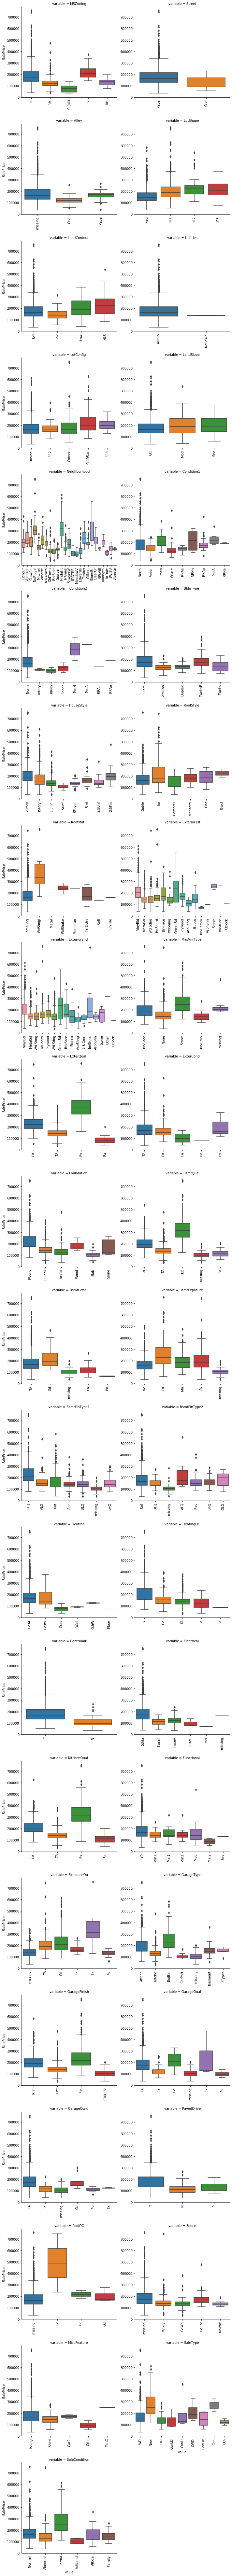

In [44]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(data_melted, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", "SalePrice")

Таким образом можно изучать зависимость цены от категориальных переменных. Основное внимание - на создание новых признаков за счет выделения в отдельные переменные категорий, которые значительно отличаются от других (например, деревянные крыши). Кроме того, уменьшение размерности внутри категорий, а также работа с выбросами.

### Задание.
Выполнить анализ трех категориальных признаков, выбранных по собственному усмотрению.

Анализ и выводы (с обоснованиями) оформить в виде отчета.

## Дополнительные материалы
Существуют специальные библиотеки для EDA. Например, pandas_profiling. Ее нет в стандартном наборе Анаконды, но ее легко установить через pip. 
[Статья на хабре](https://habr.com/ru/company/ruvds/blog/451478/)
